## CIFAR-10 Dataset Predicition Using CNN in Tensorlfow with Keras

### Import libraries

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from keras.optimizers import RMSprop, Adam, SGD
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Load CIFAR-10 datasets

In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = np.max(y_test)+1
print('x_train shape:', x_train.shape)
print(num_classes, 'number of classes')
print(x_train.shape[0], 'train images')
print(x_test.shape[0], 'test images')

idx = np.random.randint(0, len(y_test), 5)
print('Some sample levels: ', y_test[idx[0]], y_test[idx[1]], y_test[idx[2]], y_test[idx[3]], y_test[idx[4]])

x_train shape: (50000, 32, 32, 3)
10 number of classes
50000 train images
10000 test images
Some sample levels:  [0] [3] [6] [7] [4]


### Display sample training images

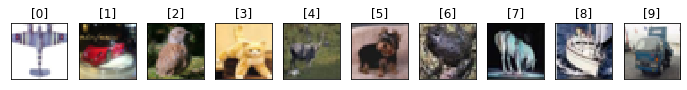

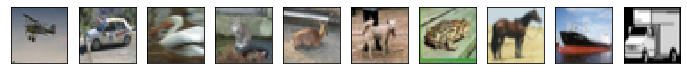

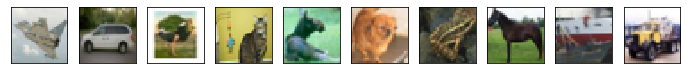

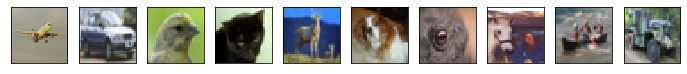

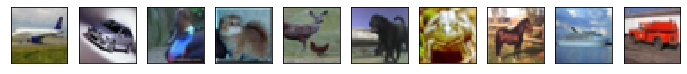

In [32]:
"""
[0] -> airplane             [5] -> dog
[1] -> automobile           [6] -> frog
[2] -> bird                 [7] -> horse
[3] -> cat                  [8] -> ship
[4] -> deer                 [9] -> truck
"""
for j in range(5):
    fig = plt.figure(figsize=(12,12))
    rows = 1
    cols = 10
    for i in range(1,rows*cols+1):
        img = i
        while y_train[img] != i-1: 
            img = np.random.randint(len(x_train))
        fig.add_subplot(rows, cols, i)
        plt.imshow(x_train[img].reshape((32, 32, 3)).astype(int), cmap='gray')
        plt.xticks([]), plt.yticks([])
        if j == 0:
            plt.title(y_train[img])

### Display sample test images

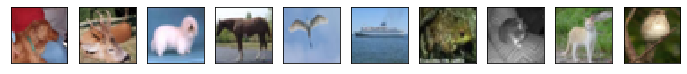

In [34]:
fig = plt.figure(figsize=(12,12))
rows = 1
cols = 10
for i in range(1, rows*cols+1):
    img = np.random.randint(len(x_test))
    fig.add_subplot(rows, cols, i)
    plt.imshow(x_test[img].reshape((32,32,3)).astype(int), cmap='gray')
    plt.xticks([]), plt.yticks([])

### Data preprocessing

In [35]:
# Conver the data from 'float64' to 'float32' 
# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### One hot encoding

In [36]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Sample one hot encoding representation of levels

In [37]:
idx = np.random.randint(0, len(y_test), 5)
print('Representation of levels after one hot encoding:')
for i in idx:
    print(np.argmax(y_test[i]), ':', y_test[i])

Representation of levels after one hot encoding:
7 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
9 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
6 : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
3 : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
6 : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Build the CNN model

In [45]:
input_shape = x_train.shape[1:]

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
__________

### Compile the model

In [46]:
lr = 0.0001
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=lr),
             metrics=['accuracy'])

### Train the model

In [47]:
batch_size = 256
epochs = 50
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.0620 - acc: 0.2420 - val_loss: 1.8896 - val_acc: 0.3248
Epoch 2/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8127 - acc: 0.3491 - val_loss: 1.7348 - val_acc: 0.3821
Epoch 3/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7078 - acc: 0.3850 - val_loss: 1.6480 - val_acc: 0.4133
Epoch 4/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.6404 - acc: 0.4091 - val_loss: 1.6259 - val_acc: 0.4152
Epoch 5/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5824 - acc: 0.4290 - val_loss: 1.5672 - val_acc: 0.4325
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5305 - acc: 0.4497 - val_loss: 1.5540 - val_acc: 0.4405
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4957 - acc: 0.4598 - val_loss: 1.4349 - val_acc

### Save the model

In [58]:
import os
folder_name = 'weights'
model_name = 'cifar10_cnn.h5'

folder_path = os.path.join(os.getcwd(), folder_name)
model_path = os.path.join(folder_path, model_name)

if not os.path.exists(folder_path):
    os.mkdir(folder_path)
model.save(model_path)
print('Model saved at %s ' % model_path)

Model saved at C:\Users\Fashiar\Research\Machine_Learning\weights\cifar10_cnn.h5 


### Evaluate the model

In [55]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 70us/step
Test loss:  0.8961022341728211
Test accuracy:  0.6837


### Load and test the model with new set of examples

In [56]:
# load the model
from keras.models import load_model
loaded_model = load_model(model_path)
print('%s model loaded sucessfully !!!' %model_name)

cifar10_cnn.h5 model loaded sucessfully !!!


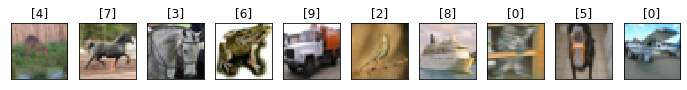

[0] -> airplane; [1] -> automobile; [2] -> bird;  [3] -> cat;  [4] -> deer
[5] -> dog;      [6] -> frog;       [7] -> horse; [8] -> ship; [9] -> truck


In [71]:
# dispaly the prediciton result of 10 random examples
idx = np.random.randint(0, len(x_test), 10)

fig=plt.figure(figsize=(12,12))
row = 1
col = 10
for i in range(1, row*col+1):
    img = ((x_test[idx[i-1]]*255.0).reshape(32,32,3)).astype(int)
    pred = loaded_model.predict_classes(x_test[idx[i-1]].reshape(1,32,32,3))
    
    fig.add_subplot(row, col, i)
    plt.imshow(img, cmap="gray")
    plt.title(pred)
    plt.xticks([])
    plt.yticks([])
plt.show()

print('[0] -> airplane; [1] -> automobile; [2] -> bird;  [3] -> cat;  [4] -> deer')
print('[5] -> dog;      [6] -> frog;       [7] -> horse; [8] -> ship; [9] -> truck')